In [1]:
import numpy as np
from ipywidgets import interact, widgets
import os
import glob
import IPython.display 
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def showflare(file, index):
    #only looking at one csv
    direct = os.listdir(file)
    image = file +'/' + direct[index]
    return IPython.display.Image(filename = image)

In [3]:
# files = found_flares_436 , found_flares_539 , found_flares_638
slider = widgets.IntSlider(min=0,max=2000,step=1,value=1)

In [4]:
interact(showflare, file='found_flares_436', index=slider);  99379

interactive(children=(Text(value='found_flares_436', description='file'), IntSlider(value=1, description='index', max=2000), Output()), _dom_classes=('widget-interact',))

In [159]:
def duplicatef(mint, maxt):
    dup = np.zeros_like(mint)
    for i in range(len(mint)):
        overlap = sum(((mint >= mint[i]) & (mint <= maxt[i])) | 
                      ((maxt >= mint[i]) & (maxt <= maxt[i])) |
                      ((maxt <= mint[i]) & (maxt >= maxt[i])))
        dup[i] = overlap
    return dup

In [36]:
duplicatef(file)

2
2
2
3
2
2
2
3
2
2
1
1
2
2
2
2
1
1
2
2
2
2
1
3


In [106]:
%gui asyncio
import asyncio
def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        # make the new value available
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    return future

ToggleButtons(description='Class:', options=('Good', 'Maybe', 'Bad'), value='Good')

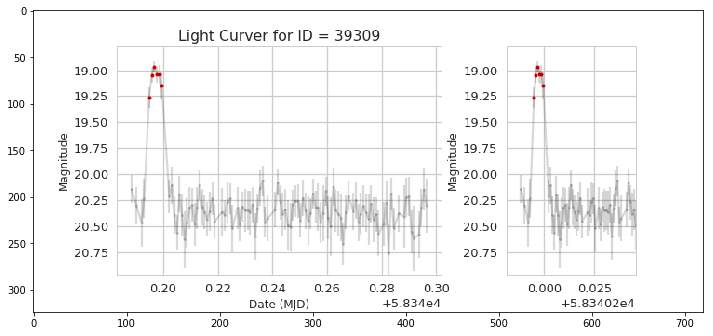

In [107]:
from ipywidgets import ToggleButtons
widg = ToggleButtons(
    options=['Good', 'Maybe', 'Bad'],
    description='Class:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
)

async def f(file):
    df = pd.read_csv(file)
    labels = np.empty(len(df), dtype='U5') 
    dup = duplicatef(df['mintime'], df['maxtime'])
    for i in range(len(df)):
        if dup[i] <= 2:
            imgname = file.split('/')[:-1][0]+ '/' + df['match_file'].values[i][:-8] + '_id_' + str(df['id'].values[i]) + '_type_' + df['type'].values[i] + '.png'
            img = mpimg.imread(imgname)
            plt.figure(figsize=(12,10))
            plt.imshow(img)
            plt.show(block=False)
            plt.close()
            x = await wait_for_change(widg, 'value')
            #print('async function continued with value %s'%x) #save in an ouput array
            labels[i] = x
            
asyncio.ensure_future(f('found_flares_488/ztf_000488_zr_c01_q2_match_programid2.csv'))
widg

In [177]:
def inspect(file):    
    df = pd.read_csv(file)
    labels = np.zeros(len(df), dtype='U5') 
    plotnames = np.empty(len(df), dtype=object) 
    dup = duplicatef(df['mintime'], df['maxtime'])
    for i in range(len(df)):
        imgname = file.split('/')[:-1][0]+ '/' + df['match_file'].values[i][:-8] + '_id_' + str(df['id'].values[i]) + '_type_' + df['type'].values[i] + '.png'
        plotnames[i] = imgname
        if dup[i] <= 2:
            img = mpimg.imread(imgname)
            plt.figure(figsize=(12,10))
            plt.imshow(img)
            #plt.draw(img)
            plt.show(block=False)
            x = input('Definitely = 1, Definitely Something = 2, Maybe = 3, definitly Not = 4, Classification = ')
            plt.close()
            plt.gcf()
            #x = await wait_for_change(widg, 'value')
            #print('async function continued with value %s'%x) #save in an ouput array
            labels[i] = x
    df['plot_name'] = plotnames
    df['labels'] = labels
    df.to_csv(file[:-4] + '_full.csv')
    return df

1) definitley a flare, or flare shape

2) Looks like a flare but symetric  

3) Probably something, but too few points

4) Definitely not, At the end or variable star

In [249]:
#df = inspect('found_flares_436/ztf_000436_zr_c16_q4_match_programid2.csv')

In [343]:
'found_flares_488/ztf_000488_zr_c01_q2_match_programid2.csv'
'./[0-9].*'
result = glob.glob('found_flares_436/*full.csv')
flares = pd.DataFrame()
flares_full = pd.DataFrame()
for i in result:
    df = pd.read_csv(i)
    flares = flares.append(df.loc[df['labels'].isin(['1'])])
    #flares = flares.append(df.loc[df['labels'].isin(['2'])])
    flares_full = flares_full.append(df)

In [708]:
pd.set_option('display.max_rows', None)  # or 1000

len(flares)

67

In [520]:
#print(flares['plot_name'])
#plt.figure(figsize=(12,10))
#plt.imshow(mpimg.imread(flares['plot_name']))
#plt.show(block=False)
#plt.close()
#plt.gcf()


def look(df):    
    for i in range(len(df)):
        imgname = df['plot_name'].values[i]
        img = mpimg.imread(imgname)
        plt.figure(figsize=(12,10))
        plt.imshow(img)
        plt.show(block=False)
        #x = input('Definitely = 1, Definitely Something = 2, Maybe = 3, definitly Not = 4, Classification = ')
        plt.close()
       # plt.gcf()
    #df.to_csv('flares_1_2.csv')
    return

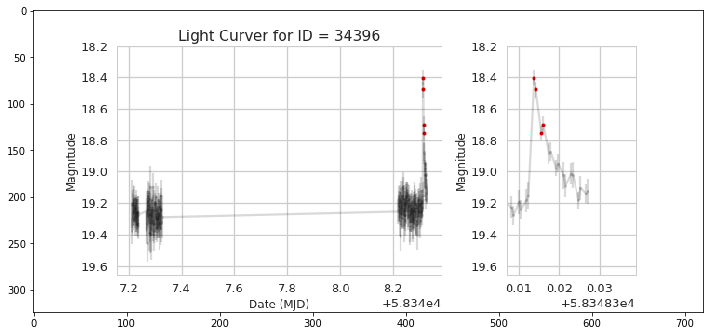

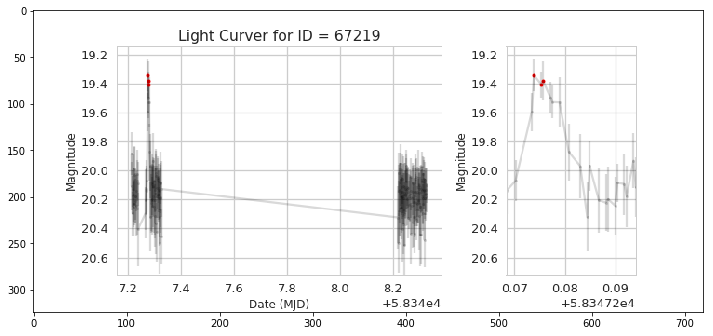

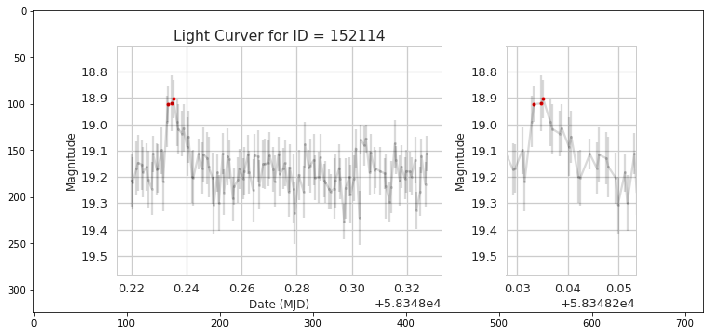

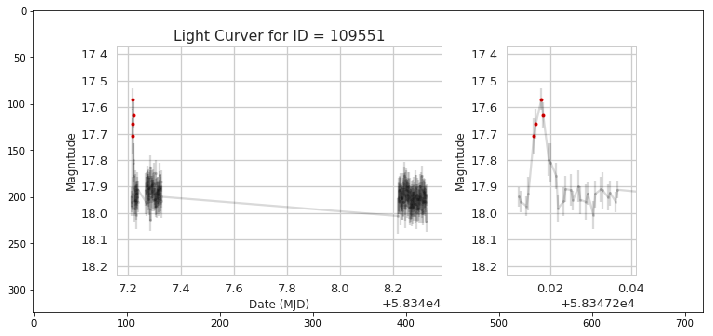

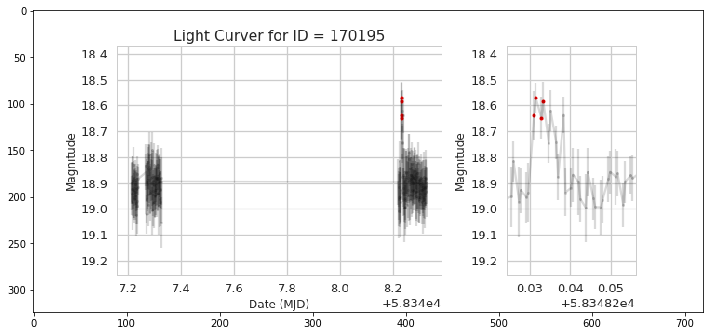

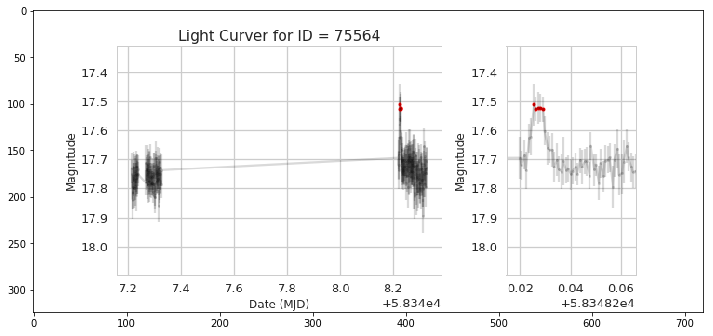

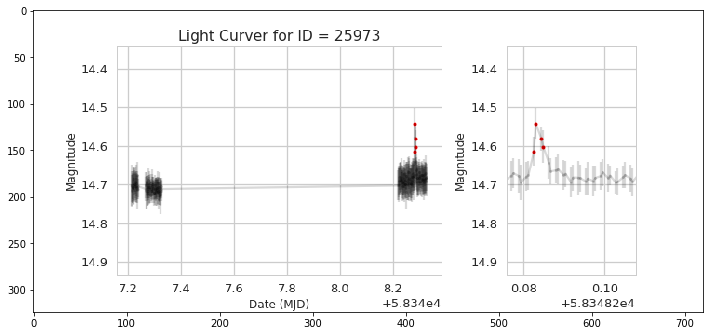

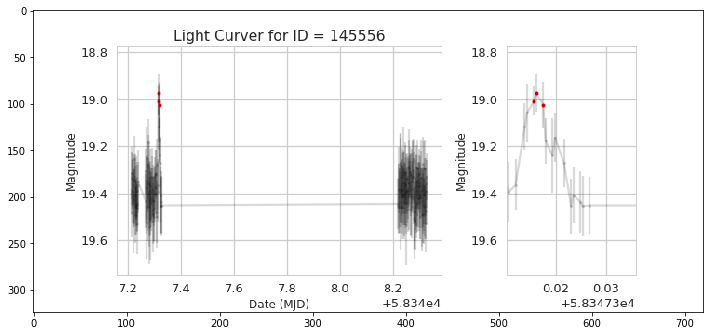

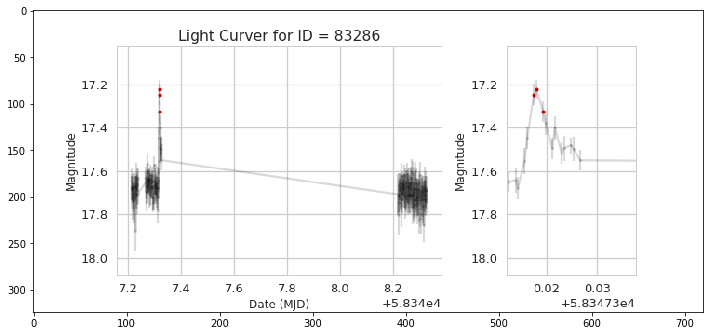

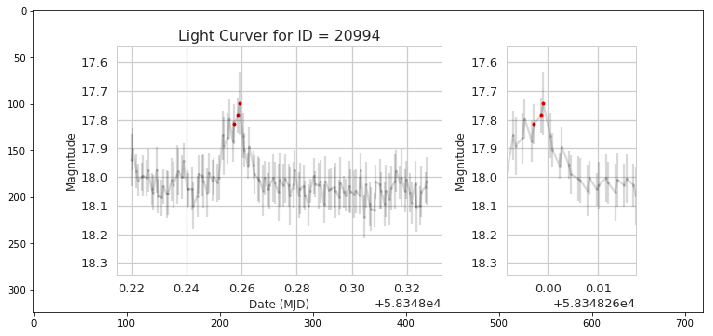

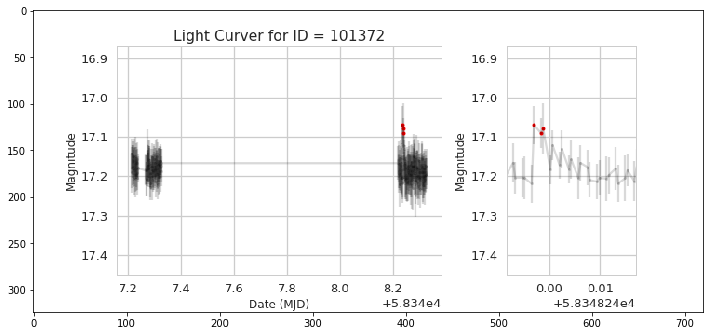

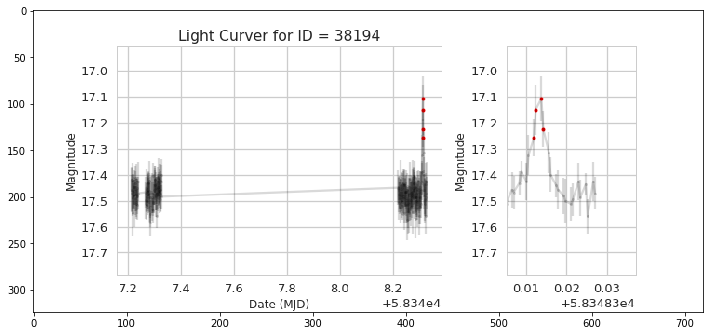

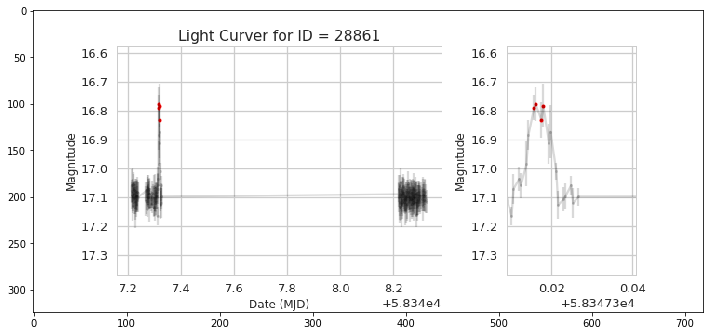

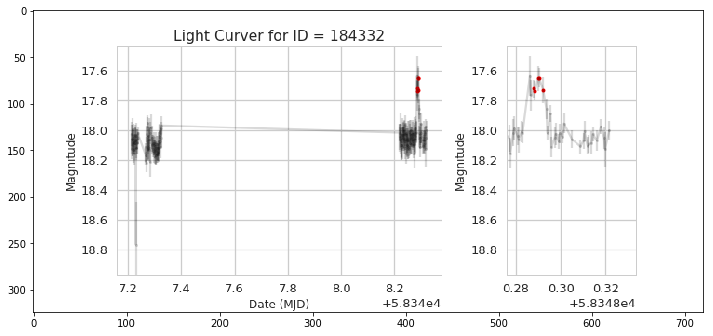

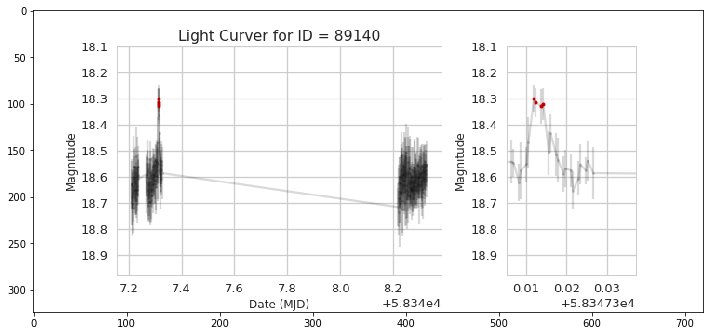

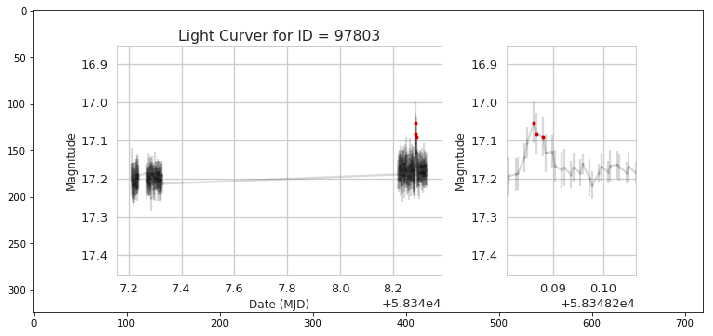

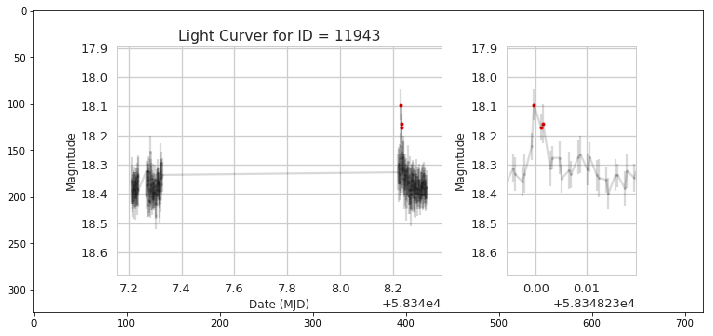

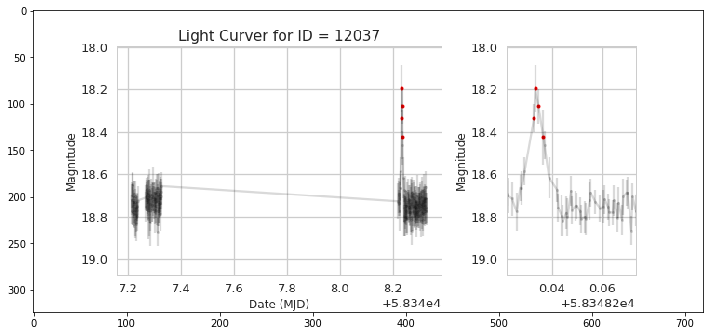

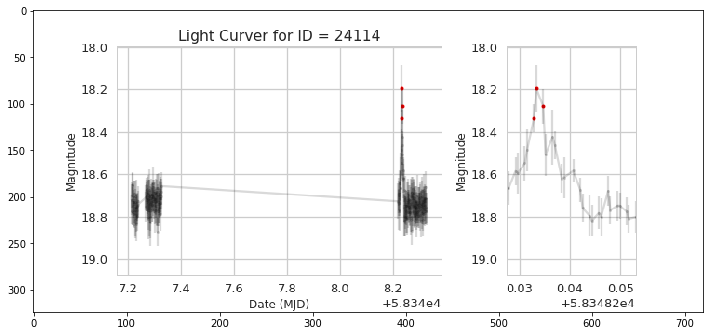

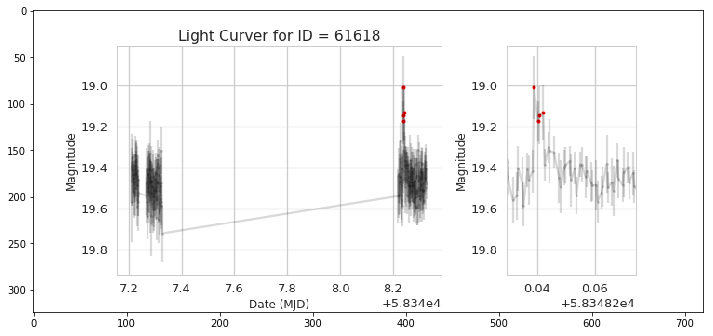

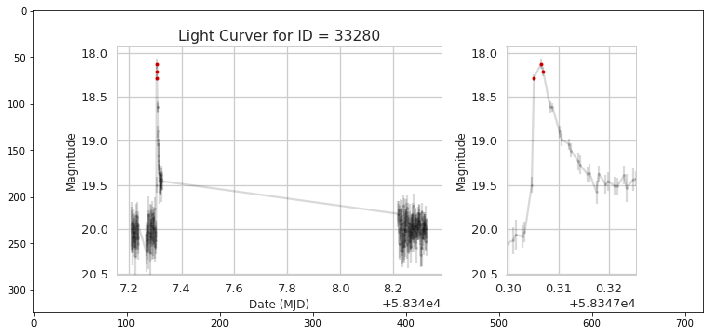

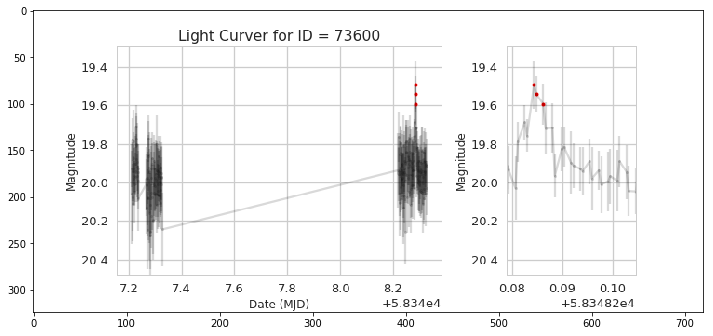

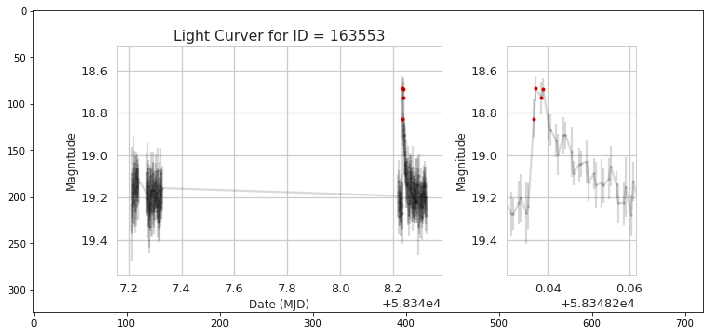

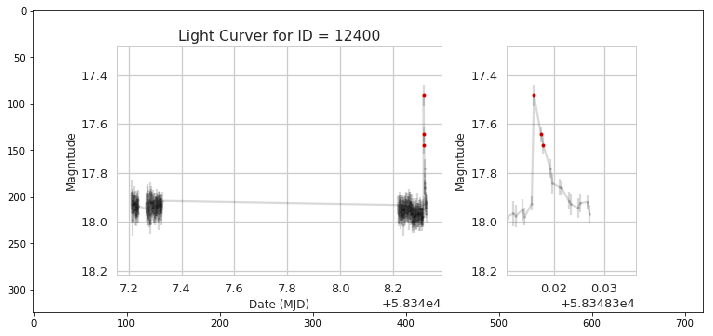

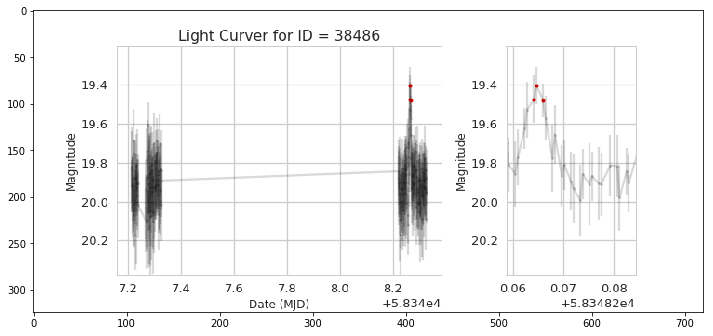

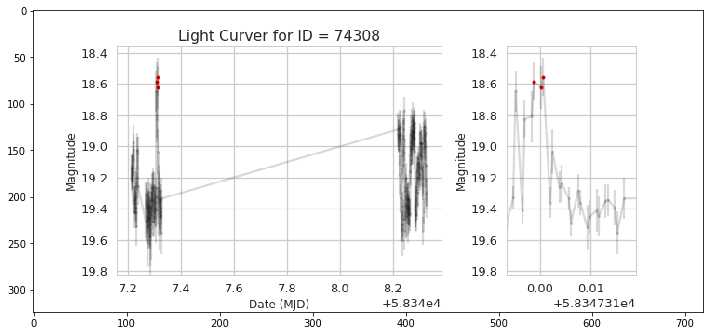

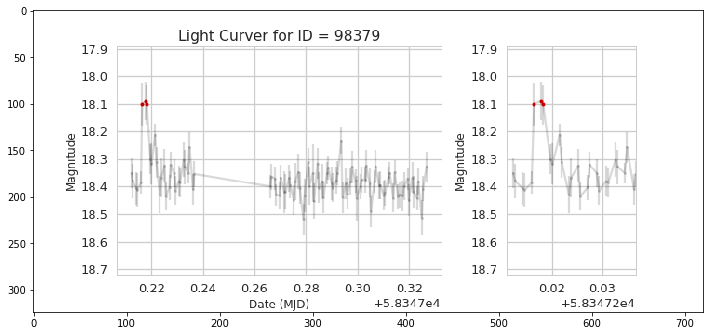

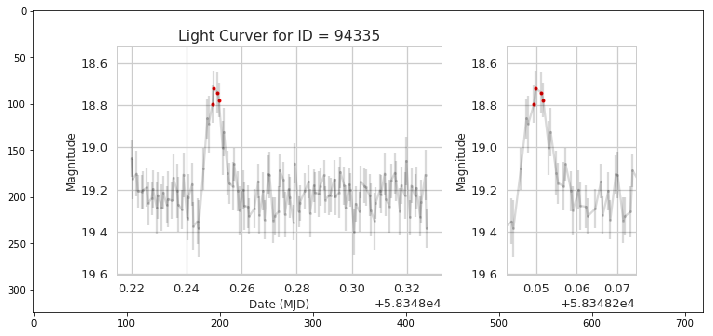

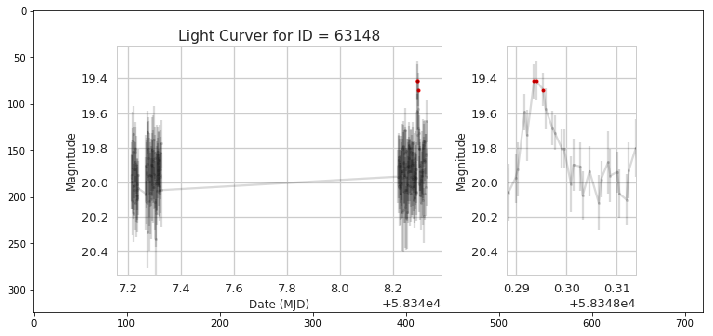

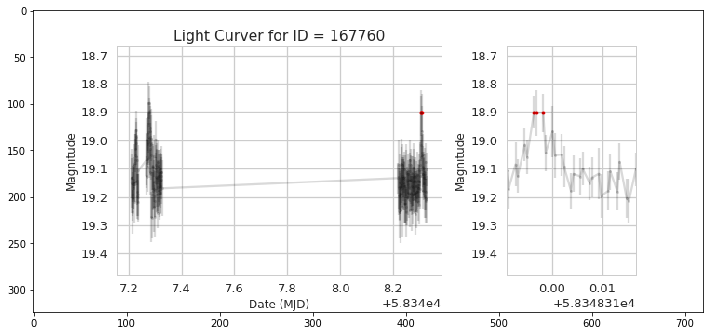

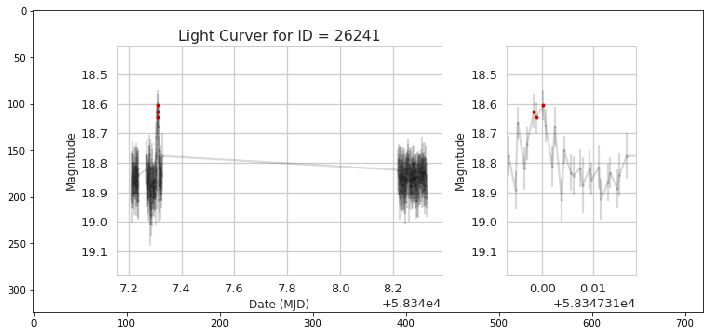

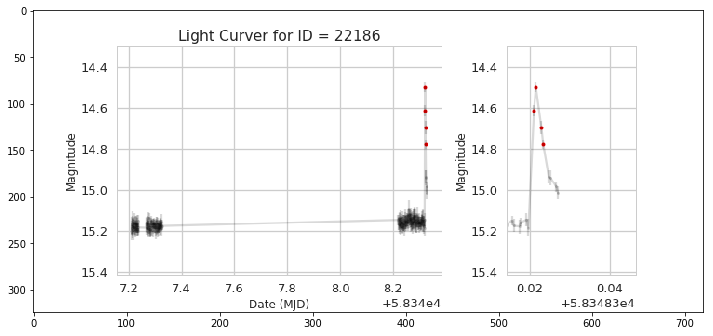

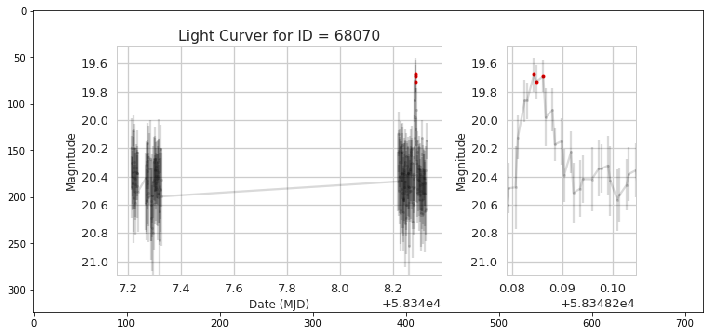

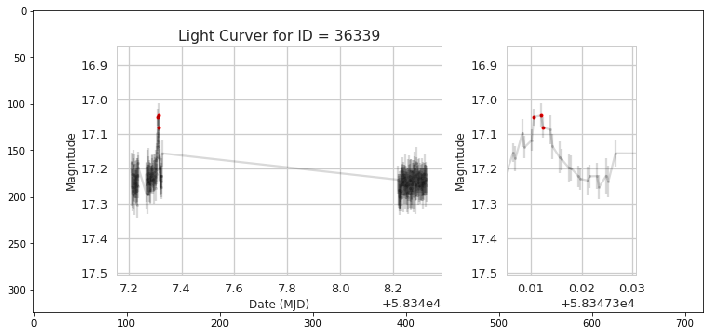

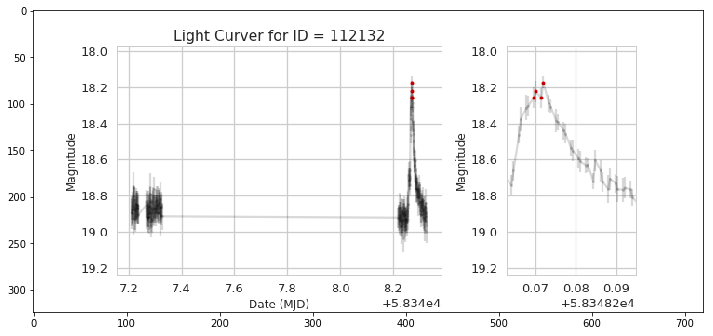

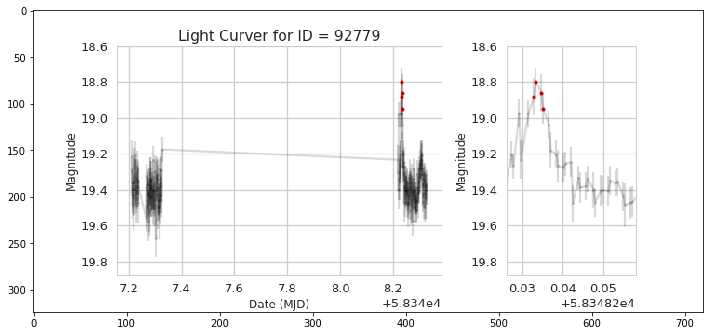

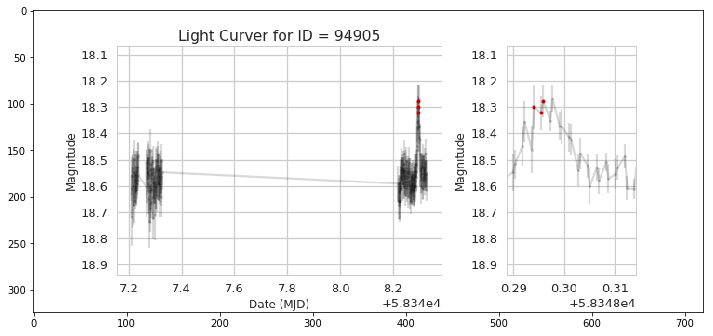

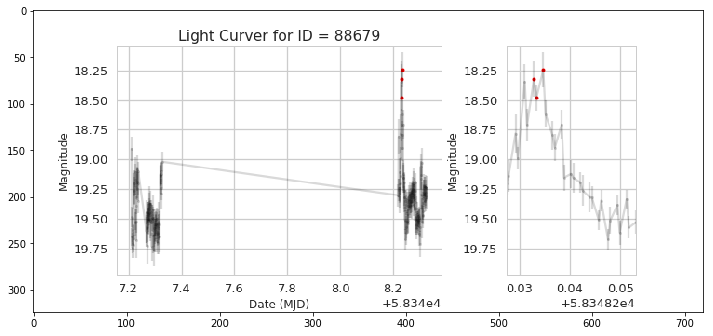

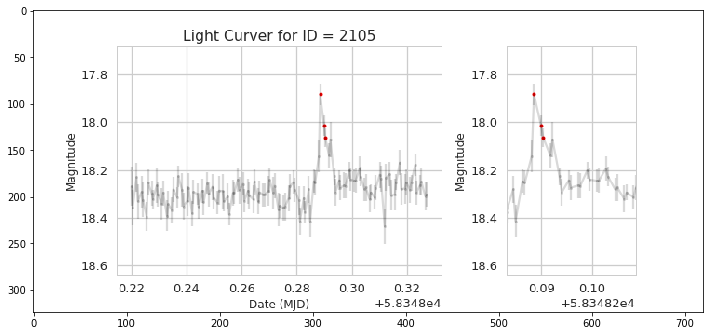

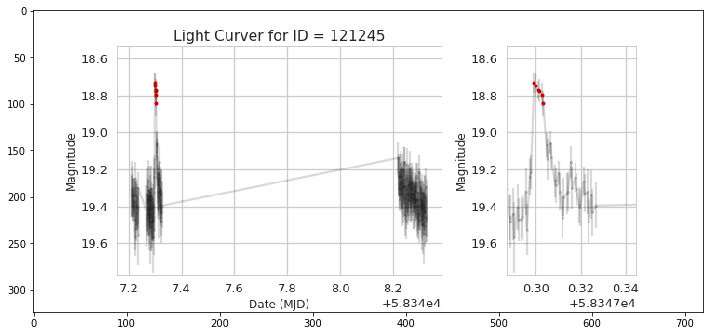

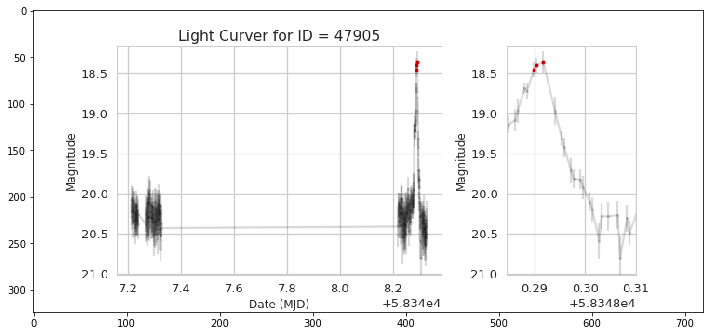

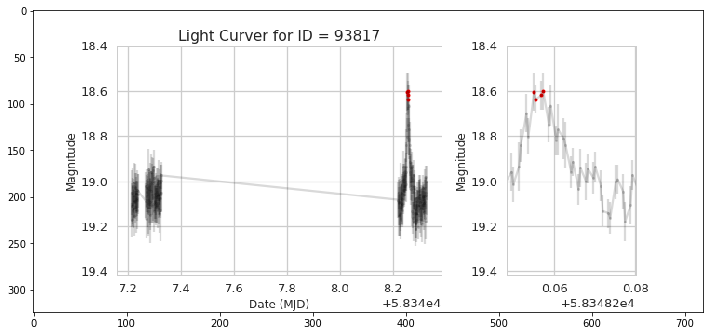

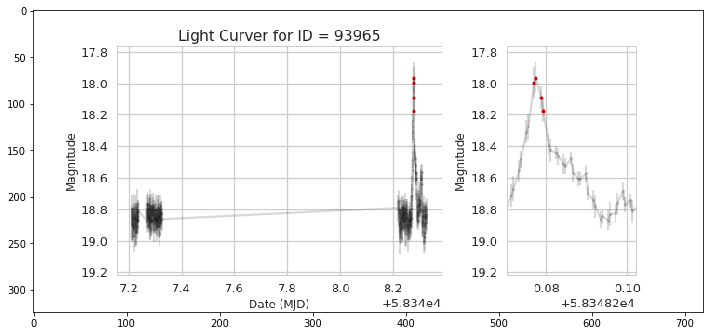

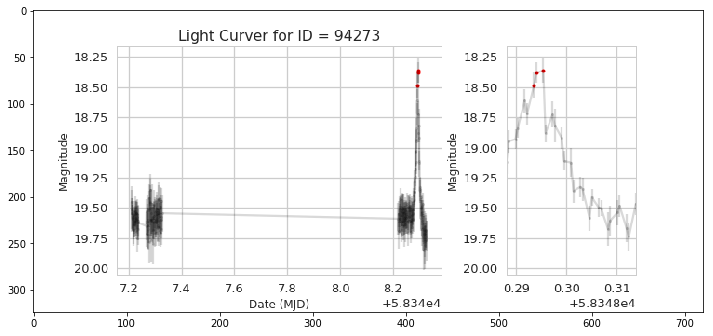

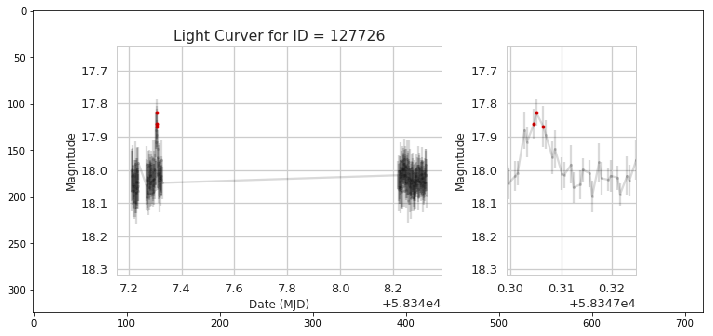

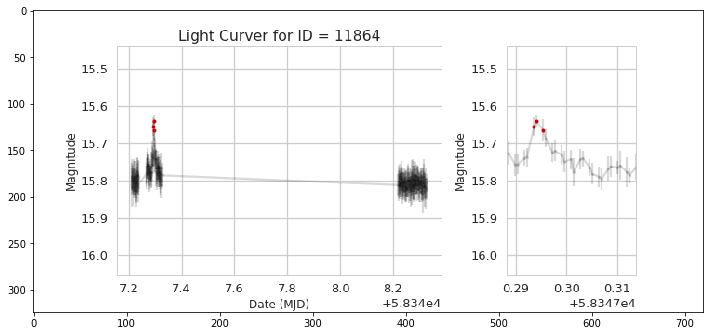

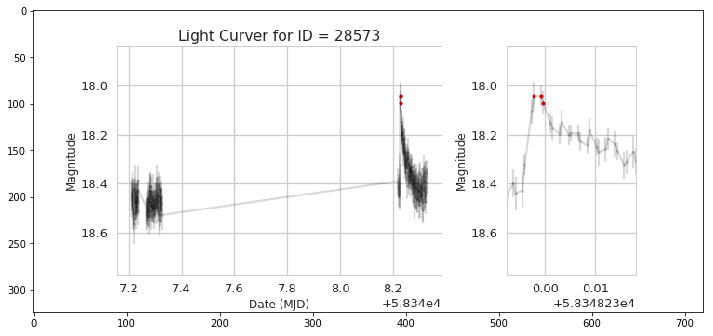

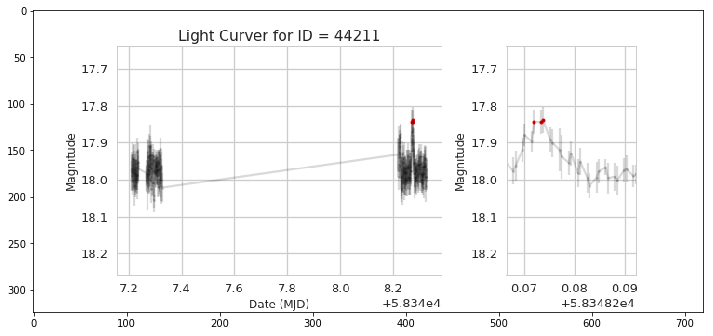

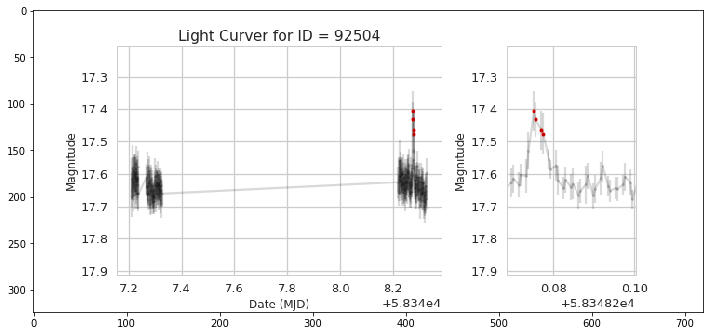

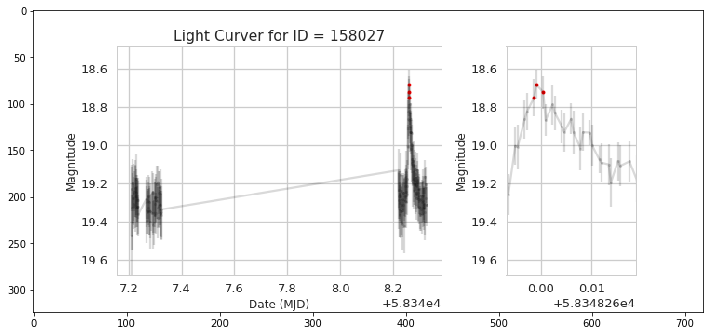

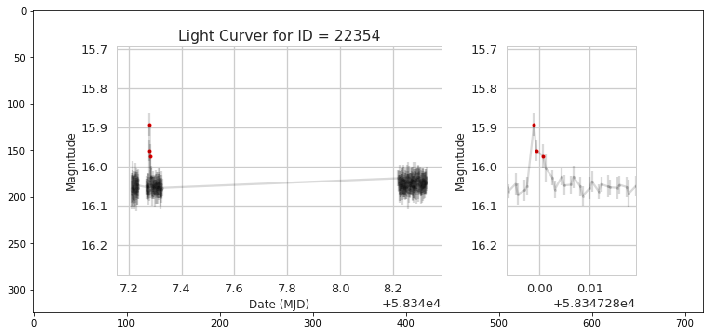

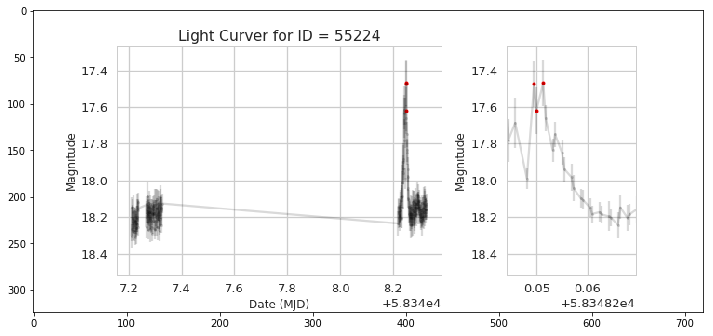

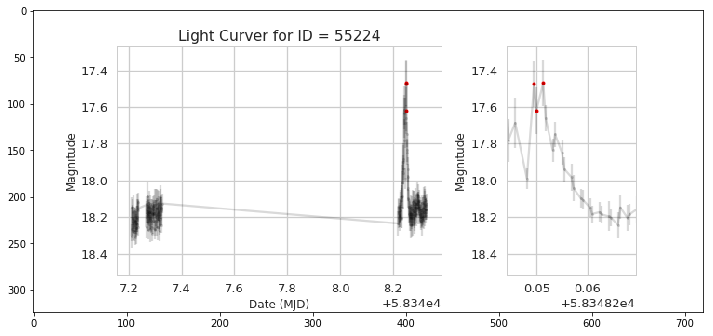

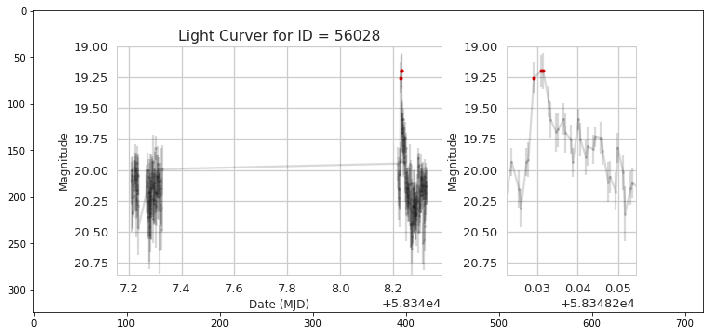

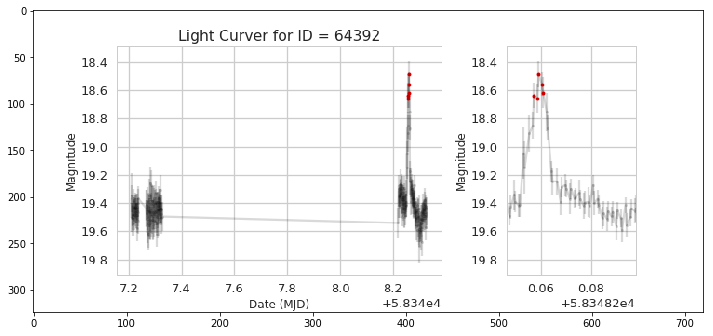

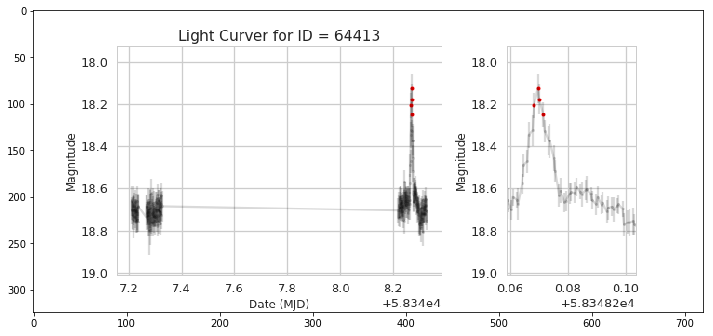

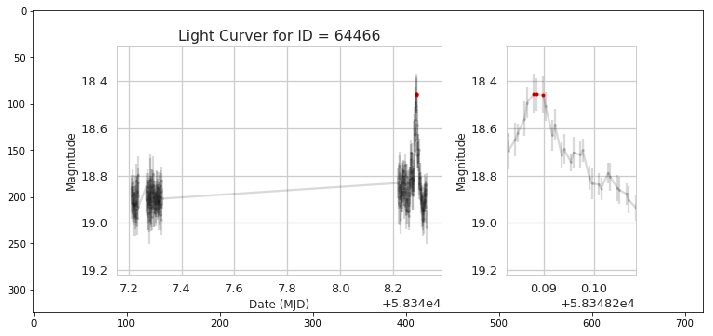

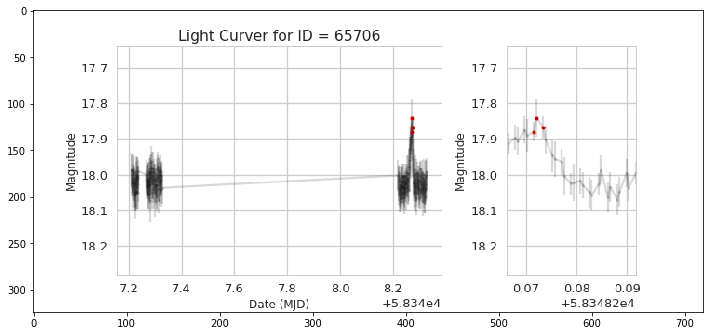

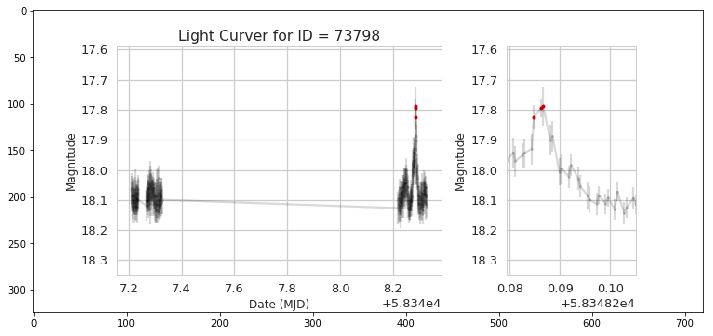

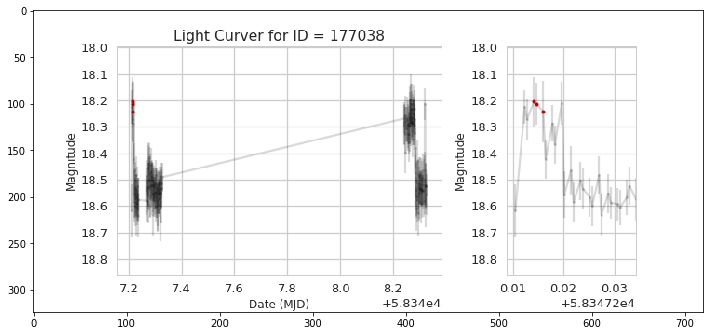

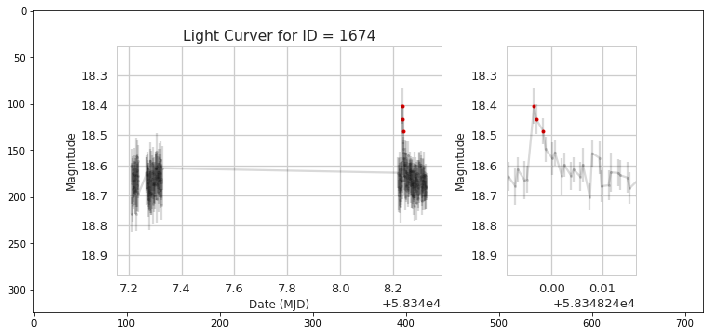

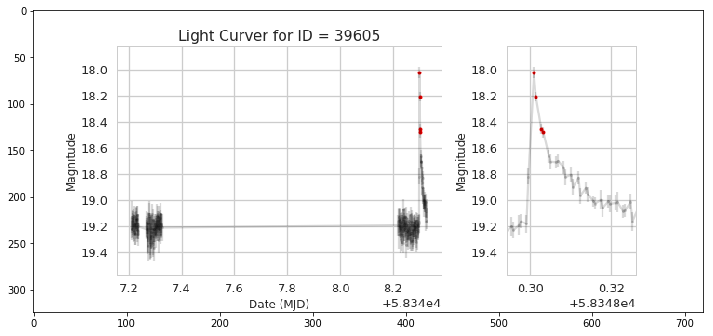

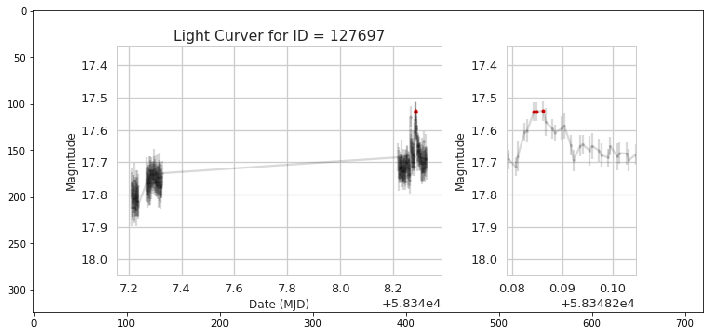

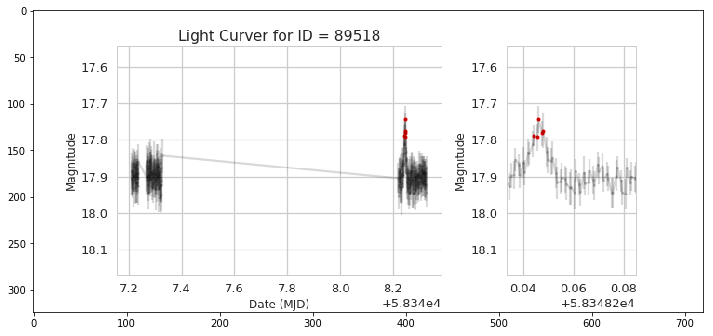

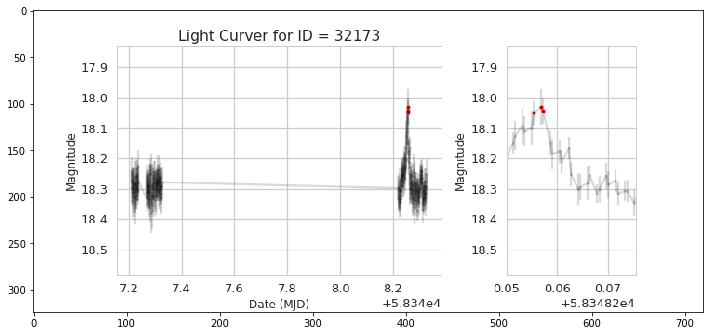

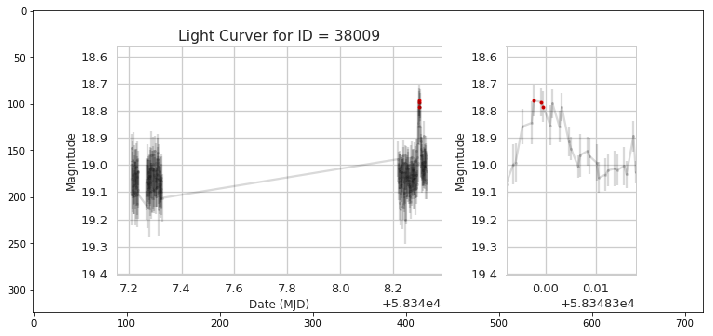

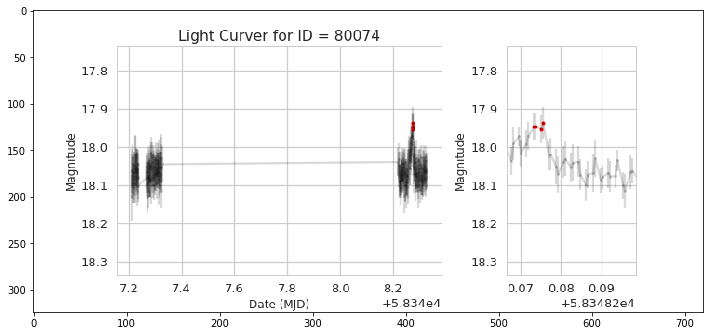

In [521]:
look(flares)

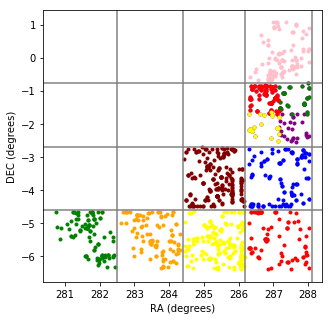

In [488]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)




ax.set_xlabel('RA (degrees)')
ax.set_ylabel('DEC (degrees)')
#ax.plot(flares_full['ra'],flares_full['dec'], linestyle='none', marker='.', color='red', alpha=.3, label='All Detections')
#ax.plot(flares['ra'],flares['dec'], linestyle='none', marker='.', color='black')
ax.plot(flares_full['ra'][0:100],flares_full['dec'][0:100], linestyle='none', marker='.', color='red')
ax.plot(flares_full['ra'][101:327],flares_full['dec'][101:327], linestyle='none', marker='.', color='yellow')
ax.plot(flares_full['ra'][328:433],flares_full['dec'][328:433], linestyle='none', marker='.', color='orange')
ax.plot(flares_full['ra'][434:536],flares_full['dec'][434:536], linestyle='none', marker='.', color='green')
ax.plot(flares_full['ra'][537:654],flares_full['dec'][537:654], linestyle='none', marker='.', color='blue')
ax.plot(flares_full['ra'][655:877],flares_full['dec'][655:877], linestyle='none', marker='.', color='maroon')


ax.plot(flares_full['ra'][1016:1173],flares_full['dec'][1016:1173], linestyle='none', marker='.', color='purple')
ax.plot(flares_full['ra'][1585:1738],flares_full['dec'][1585:1738], linestyle='none', marker='.', color='pink')

ax.plot(flares_full['ra'][1016:1051],flares_full['dec'][1016:1051], linestyle='none', marker='.', color='green')
ax.plot(flares_full['ra'][1052:1118],flares_full['dec'][1052:1118], linestyle='none', marker='.', color='red')
ax.plot(flares_full['ra'][1119:1145],flares_full['dec'][1119:1145], linestyle='none', marker='.', color='yellow')

plt.axvline(282.5, color='grey')
plt.axvline(284.4, color='grey')
plt.axvline(286.2, color='grey')
plt.axvline(288.1, color='grey')

plt.axhline(-0.75, color='grey')
plt.axhline(-2.7, color='grey')
plt.axhline(-4.6, color='grey')
#fig.savefig('ax2_fig', dpi=300)

#should be square


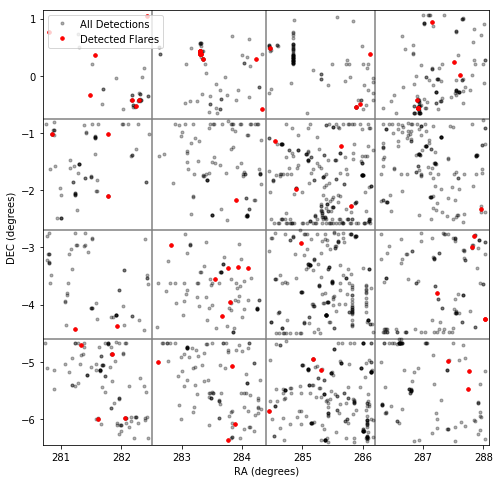

In [707]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.axvline(282.5, color='grey')
plt.axvline(284.4, color='grey')
plt.axvline(286.2, color='grey')

plt.axhline(-0.75, color='grey')
plt.axhline(-2.7, color='grey')
plt.axhline(-4.6, color='grey')
ax.set_xlim(280.7,288.1)
ax.set_ylim(-6.45,1.15)

ax.set_xlabel('RA (degrees)')
ax.set_ylabel('DEC (degrees)')

ax.plot(flares_full['ra'],flares_full['dec'], linestyle='none', marker='.', color='black', alpha=.3, label='All Detections')
ax.plot(flares['ra'],flares['dec'], linestyle='none', marker='.',markersize=7, color='red', label='Detected Flares') 
#ax.plot(284.544257,-1.136051,color='green', linestyle='none', marker='+')

ax.legend(loc='upper left')
fig.savefig('images/detection_map2.png', dpi=300)
#1.0"/pixel

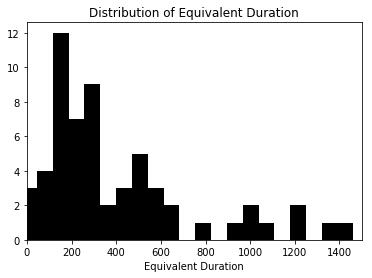

In [617]:
plt.hist(flares['equivdur'], bins=50, color='black')
plt.xlim(0,1500)
plt.xlabel('Equivalent Duration')
plt.title('Distribution of Equivalent Duration')
plt.savefig('images/equivdur.png', dpi=300)

(0, 80)

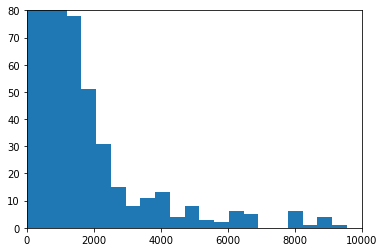

In [364]:
plt.hist(flares_full['equivdur'], bins=10000)
plt.xlim(0,10000)
plt.ylim(0,80)

(72,)


/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


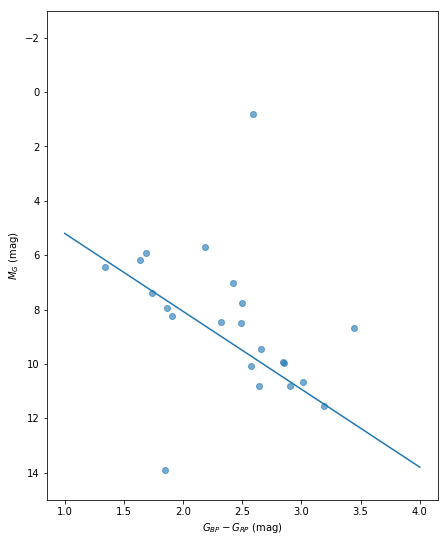

In [556]:
df1 = pd.read_csv('flares_1_2_gaiaX.csv')


ok1 = np.where(np.isfinite(df1[u'parallax']) & 
              (df1[u'parallax_error'] / df1[u'parallax'] < 0.2) &
              np.isfinite(df1[u'bp_rp']) & 
              (df1[u'phot_bp_mean_flux_error']/df1[u'phot_bp_mean_flux'] < 0.2) & 
              (df1[u'phot_rp_mean_flux_error']/df1[u'phot_rp_mean_flux'] < 0.2) & 
              (df1[u'phot_g_mean_flux_error']/df1[u'phot_g_mean_flux'] < 0.2))[0]

print(ok1.shape)


plt.figure(figsize=(7,9))
plt.scatter(df1['bp_rp'][ok1], df1['phot_g_mean_mag'][ok1] - 5. * np.log10(1000 / df1[u'parallax'].values[ok1]) + 5, 
            alpha=0.6,)# c=np.log10(df1['equivdur'][ok1]), s=df1['equivdur'][ok1])
plt.ylim(15,-3)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.plot([1,4],[5.2,13.8])

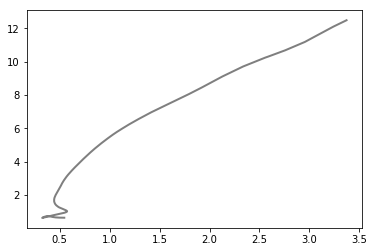

In [657]:

#  MIST isochrones
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5)

/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log10


0      2.673649
10     1.064892
12     1.336857
16     1.260532
20     1.346626
21     1.576250
32     1.842978
38     1.785950
48     1.494909
51     2.841949
52     1.504654
54     1.308796
56     1.462107
62     1.902504
67     1.777853
80     1.731093
94     1.509968
101    1.963633
107    3.186588
110    1.635943
113    1.860024
115    1.682643
117    1.766396
123    3.017338
128    2.906591
130    2.501389
136    1.787544
141    2.029278
145    2.860367
155    2.032753
156    1.956806
160    1.289167
173    1.873379
179    1.804022
180    2.572897
187    1.427422
189    1.712917
196    2.127985
198    2.048817
199    1.866411
200    2.493485
203    2.622950
204    2.864471
205    2.154921
207    1.753851
211    2.156080
213    2.188122
219    2.654448
221    1.843834
222    2.641642
234    1.594925
244    1.611036
245    1.411709
247    2.319847
250    3.092138
254    1.669691
255    1.641968
262    1.738733
263    2.591994
265    3.715748
266    3.715748
271    3.302396
279    3

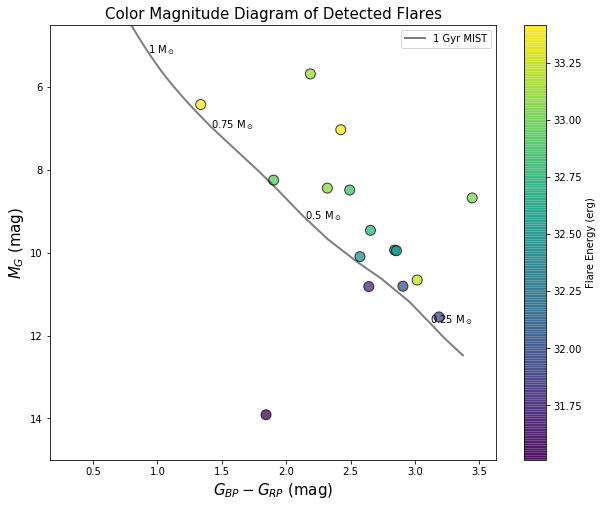

In [718]:
from astropy import units as u
from astropy import constants as const

def LUM(gflux, plx, zp='AB', mag='G'):
    # from https://www.cosmos.esa.int/web/gaia/iow_20180316
    G0 = 25.7915509947 # AB_ZP mag

    # from Table 5.4: https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu5pho
    #/sec_cu5pho_calibr/ssec_cu5pho_calibr_extern.html
    lp = 623.06 * u.nm # pivot wavelength of G filter

    m_G = -2.5 * np.log10(gflux) + G0
    F_AB_JY = 3631 * 10**(-0.4 * m_G)
    F_AB = F_AB_JY  * 1e-23 * u.erg/u.s/u.cm/u.cm/u.Hz

    dist = (1000./plx) * u.pc
    L = ((F_AB * dist**2) * (const.c/lp).to('Hz')).to(u.erg / u.s)
    return L.value


#And then you can call it like this:
LL = LUM(df1['phot_g_mean_flux'][ok1].values, df1['parallax'][ok1].values)

#And use it like this:
plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
#plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
#         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
plt.ylim(15,4.5)
plt.scatter(df1['bp_rp'][ok1], df1['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./df1[u'parallax'].values[ok1]) + 5, 
            alpha=0.75, s=100, edgecolors='k',c=np.log10(df1['equivdur'][ok1]) + np.log10(LL), label=None)
plt.colorbar(label='Flare Energy (erg)')
plt.text(0.93, 5.18, '1 M$_\odot$', fontsize=10)
plt.text(1.42, 6.98, '0.75 M$_\odot$', fontsize=10)
plt.text(2.15, 9.18, '0.5 M$_\odot$', fontsize=10)
plt.text(3.12, 11.7, '0.25 M$_\odot$', fontsize=10)
plt.legend()
print(df1['bp_rp'][ok1], df1['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./df1[u'parallax'].values[ok1]) + 5)
#plt.savefig('images/colormagdiagram.png', dpi=300)

In [688]:
ok2 = np.where((np.isfinite(df1['equivdur'][ok1])) & (df1['equivdur'][ok1] > 0))[0]
x1 = np.log10(df1['equivdur'][ok1[ok2]]) + np.log10(LL[ok2])
x = (df1['equivdur'][ok1[ok2]]) * (LL[ok2])
print(x1)

0      33.668408
10     32.960665
12     33.415869
16     33.933706
20     35.537098
21     35.331458
38     36.476381
51     32.347850
52     33.862229
54     32.040157
56     34.960760
62     32.926654
67     35.022152
80     35.182915
101    36.314973
107    31.900445
117    34.094114
123    33.254804
128    32.000637
136    33.657359
141    33.455198
145    33.846897
155    30.934416
156    38.290456
160    34.122204
173    34.032661
179    33.666580
180    32.470950
187    34.572440
189    34.454027
196    34.535898
198    33.330449
200    32.838647
205    33.976157
207    33.886051
211    33.678387
213    33.126600
219    32.747230
221    31.511921
222    31.726115
234    32.747800
244    34.138814
245    33.449549
247    33.087848
250    33.736210
254    33.466630
255    34.896009
265    36.475263
266    36.319262
271    33.409818
279    33.940339
282    33.436499
283    35.307438
285    33.040049
286    33.375782
287    32.551860
289    34.926685
291    33.277329
295    34.4671

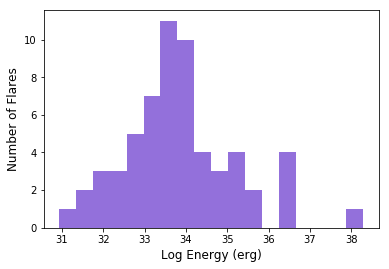

In [679]:
plt.hist(np.log10(x), bins=18, color='mediumpurple')
plt.xlabel('Log Energy (erg)', size=12)
plt.ylabel('Number of Flares', size=12)

#plt.title('Distribution of Flare Energies')
# plt.xscale('log')
         #df1['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./df1[u'parallax'].values[ok1]) + 5, 
         #   alpha=0.75, c=np.log10(df1['equivdur'][ok1]) + np.log10(LL))
plt.savefig('energydistribution.png', dpi=300)

Text(0,0.5,'Number of Flares')

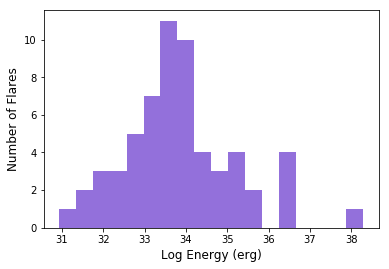

In [689]:
plt.hist(x1, bins=18, color='mediumpurple')
plt.xlabel('Log Energy (erg)', size=12)
plt.ylabel('Number of Flares', size=12)

#plt.title('Distribution of Flare Energies')
# plt.xscale('log')
         #df1['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./df1[u'parallax'].values[ok1]) + 5, 
         #   alpha=0.75, c=np.log10(df1['equivdur'][ok1]) + np.log10(LL))
#plt.savefig('energydistribution.png', dpi=300)